In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Моя настройка

In [2]:
D = 100  # длина сообщения [байт]
L = D + 59  # общая длина пакета [байт]
T = 12 * 10 ** -3  # средний период передачи пакетов [с]
P_t = 40 * 10 ** -3 # мощность передатчика [Вт]
F = 250 * 10 ** 6 # частота несущей радиоканала [Гц]
R = 10 * 10 ** 3  # скорость передачи данных радиоканала [бит/с]
W = 20 * 10 ** 3  # ширина полосы приёмника [Гц]
P_n = 1e-14 # -110  # фоновый уровень шума [дБм]
V = 2  # скорость перемещения приёмника [м/с]
C = 299_792_458  # скорость света [м/с]

In [3]:
def wavelength(light_speed, frequency):
    return light_speed / frequency    


def distance(time):
    return time * V


def P_rx(time):
    return ((wavelength(C, F) / (4 * math.pi * distance(time))) ** 2) * P_t


def Vt_to_dBm(Vt):
    return 10 * math.log10(Vt * 1000)

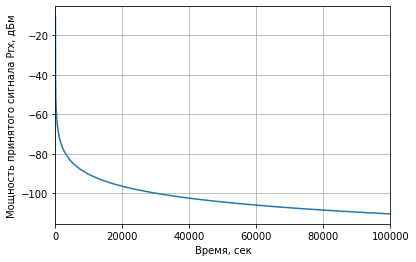

In [4]:
p_rx = [P_rx(i) for i in range(1, 100001)]
p_rx_dbm = [Vt_to_dBm(i) for i in p_rx]
times = [i for i in range(1, 100001)]

ax = plt.subplot()
ax.plot(times, p_rx_dbm)
ax.grid(True)
ax.set_xlim(0, 100_000)
ax.set_xlabel('Время, сек')
ax.set_ylabel('Мощность принятого сигнала Prx, дБм')

plt.show()

In [5]:
def ber(a):
    return 0.5 * math.erfc(math.sqrt( (a * W) / (P_n * R) ))

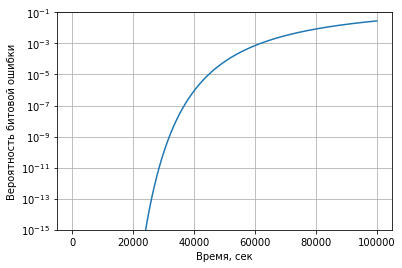

In [6]:
bers = [ber(i) for i in p_rx]

ax = plt.subplot()
ax.plot(times, bers)
ax.grid(True)
ax.set_ylim(1e-15, 1e-1)
ax.set_yscale('log')
ax.set_xlabel('Время, сек')
ax.set_ylabel('Вероятность битовой ошибки')

plt.show()

In [7]:
def per(b):
    return 1 - pow((1 - b), 8 * L)

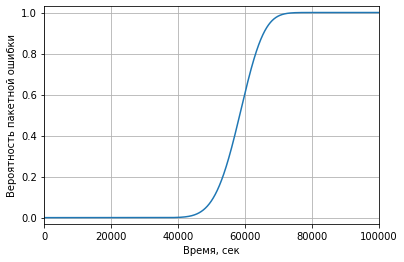

In [8]:
pers = [per(i) for i in bers]

ax = plt.subplot()
ax.plot(times, pers)
ax.grid(True)
ax.set_xlim(0, 100_000)
ax.set_ylim(-0.03, 1.03)
ax.set_xlabel('Время, сек')
ax.set_ylabel('Вероятность пакетной ошибки')

plt.show()

# Дефолтная настройка

In [9]:
D = 1000  # длина сообщения [байт]
L = D + 59  # общая длина пакета [байт]
T = 0.012  # средний период передачи пакетов [с] (12 мс)
P_t = 0.01  # мощность передатчика [Вт] (10мВт)
F = 2_000_000_000  # частота несущей радиоканала [Гц] (2ГГц)
R = 1_000_000  # скорость передачи данных радиоканала [бит/с] (1Мбит/с)
W = 2_000_000  # ширина полосы приёмника [Гц] (2МГц)
P_n = -85  # фоновый уровень шума [дБм]
V = 10  # скорость перемещения приёмника [м/с]
C = 299_792_458  # скорость света [м/с]

In [10]:
def wavelength(light_speed, frequency):
    return light_speed / frequency    


def distance(time):
    return time * V


def P_rx(time):
    return ((wavelength(C, F) / (4 * math.pi * distance(time))) ** 2) * P_t


def Vt_to_dBm(Vt):
    return 10 * math.log10(Vt * 1000)

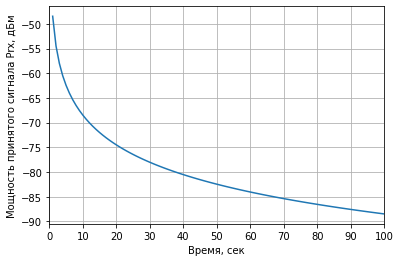

In [11]:
p_rx = [P_rx(i) for i in range(1, 101)]
p_rx = [Vt_to_dBm(i) for i in p_rx]
times = [i for i in range(1, 101)]

x_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y_ticks = [-40, -45, -50, -55, -60, -65, -70, -75, -80, -85, -90]

ax = plt.subplot()
ax.plot(times, p_rx)
ax.grid(True)
ax.set_xlim(0, 100)
ax.set_xticks(x_ticks)
ax.set_xlabel('Время, сек')
ax.set_ylabel('Мощность принятого сигнала Prx, дБм')

plt.show()